# Using Text rank algorithm for text summarisation

Textrank is a graph-based ranking algorithm like Google’s PageRank algorithm which has been successfully implemented in citation analysis. We use text rank often for keyword extraction, automated text summarization and phrase ranking. Basically, in the text rank algorithm, we measure the relationship between two or more words.

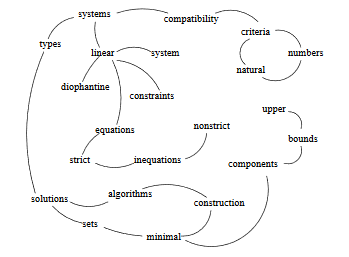

Objective is to extract the most important sentences from the original document by first generating the document semantic graph and then using the document and graph features to generate the document summary.


# Importing the Needed libraries

In [41]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt') 
import re



[nltk_data] Downloading package punkt to C:\Users\Anutosh
[nltk_data]     Tiwari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [42]:
from gensim.models import Word2Vec
from scipy import spatial
import networkx as nx

In [43]:
from nltk.tokenize import sent_tokenize
f = open("welcome.txt", "r")
f.seek(0)
text=f.read()


In [44]:
import spacy

## Converting text into sentences

In [45]:
sentences1 = sent_tokenize(text)
sentences1

["Natural Language Processing (NLP) is an important tool for understanding and\nprocessing the immense volume of unstructured data in today's world.",
 'Recently,\ndeep learning has been widely adopted for many NLP tasks because of the\nremarkable performance that deep learning algorithms have shown in a plethora\nof challenging tasks, such as, image classification, speech recognition, and realistic\ntext generation.',
 'TensorFlow, in turn, is one of the most intuitive and efficient deep\nlearning frameworks currently in existence.',
 'This book will enable aspiring deep\nlearning developers to handle massive amounts of data using NLP and TensorFlow.',
 'In this chapter, we will provide an introduction to NLP and to the rest of the book.',
 'We will answer the question, "What is Natural Language Processing?"',
 "Also, we'll\nlook at some of its most important uses.",
 'We will also consider the traditional\napproaches and the more recent deep learning-based approaches to NLP, includin

## Cleaning and preprocessing the sentences

In [46]:
nlp=spacy.load('en_core_web_sm')
from spacy.lang.en.stop_words import STOP_WORDS
def clean(text):
    text=text.strip().lower()
    # Remove the characters - <>()|&©ø"',;?~*!
    text = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", " ", str(text)).lower()
    
    # Replace any url to only the domain name
    try:
        url = re.search(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", str(text))
        repl_url = url.group(3)
        text = re.sub(r"((https*:\/*)([^\/\s]+))(.[^\s]+)", repl_url, str(text))
    except:
        pass
    doc=nlp(text)
    clean_sentences =[token.text for token in doc if not token.is_punct and not token.is_stop]
    return clean_sentences

In [47]:
sentences=[]
for i in range(len(sentences1)):
    sentences.append(clean(sentences1[i]))

### Using word to vec for word embedding

In [48]:
w2v=Word2Vec(sentences,min_count=1)

In [49]:
sentence_embeddings=[[w2v.wv[word][0] for word in words] for words in sentences]


In [50]:
max_len=max([len(tokens) for tokens in sentences])

## Padding the vectors to make them same size

In [51]:
sentence_embeddings=[np.pad(embedding,(0,max_len-len(embedding)),'constant') for embedding in sentence_embeddings]

In [52]:
similarity_matrix = np.zeros([len(sentences), len(sentences)])


In [53]:
sentence_embeddings

[array([-5.0847880e-03,  8.0150673e-03, -9.6640857e-03, -9.8263507e-04,
        -2.8264392e-05, -9.8263507e-04,  4.6363142e-03,  3.7401947e-03,
        -6.6283392e-03, -9.1608046e-03, -9.6640857e-03,  1.8034700e-03,
        -3.0212672e-03, -2.7475241e-03, -9.0596844e-03, -2.0474819e-03,
        -3.2601287e-04, -2.7920988e-03,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00], dtype=float32),
 array([ 6.2048524e-03, -9.1608046e-03,  8.0851568e-03, -7.3421719e-03,
         3.1992542e-03, -4.5475168e-03, -2.8264392e-05, -5.4128370e-03,
        -9.1608046e-03, -4.1277665e-03,  7.2234571e-03,  8.0851568e-03,
        -7.3421719e-03,  9.3126567e-03,  4.1547935e-03, -9.1238553e-03,
        -9.1608046e-03, -6.2889359e-03, -5.4128370e-03, -9.8263507e-04,
       

## Creating the similarity Matrix

In [54]:
for i,row_embedding in enumerate(sentence_embeddings):
    for j,column_embedding in enumerate(sentence_embeddings):
        similarity_matrix[i][j]=1-spatial.distance.cosine(list(row_embedding),list(column_embedding))

In [62]:
similarity_matrix

array([[ 1.00000000e+00, -1.78649679e-01,  1.95227847e-01,
        -1.49560720e-01, -6.38136687e-03,  3.31903100e-02,
         2.89079249e-01,  1.15491547e-01,  2.09420428e-01,
        -2.53736135e-02,  2.77754486e-01, -3.64822964e-03,
        -1.88190565e-01,  4.21283841e-01,  2.34076142e-01,
        -1.75469164e-02, -2.47213226e-02,  2.63264269e-01,
         1.52910471e-01,  2.27055684e-01, -1.99471489e-02,
        -4.71562475e-01,  1.57344833e-01,  3.89295578e-01,
         3.35474074e-01,  3.24282087e-02,  1.01265475e-01,
        -3.14335465e-01, -2.09893078e-01],
       [-1.78649679e-01,  1.00000000e+00,  1.84489459e-01,
        -1.77218835e-03,  1.56432599e-01,  2.24211976e-01,
        -3.16538662e-01, -2.25421749e-02,  2.94168562e-01,
         1.09480336e-01, -4.26417328e-02, -5.66856451e-02,
         1.32055342e-01, -1.68497324e-01, -2.08476320e-01,
         4.75536078e-01, -1.14137217e-01, -1.24706402e-01,
        -2.06734732e-01, -2.21791595e-01, -2.27941409e-01,
        -1.12

## Creating graph from the vectors

In [56]:
nx_graph = nx.from_numpy_array(similarity_matrix)

## Using page rank on the graph made

In [57]:
scores = nx.pagerank(nx_graph, tol=1.0)

In [63]:
scores

{0: 0.3323279809157779,
 1: -0.07242794536624945,
 2: -0.11683956447786105,
 3: -0.13611650417867507,
 4: 0.02439796637098145,
 5: -0.03732911729330193,
 6: 0.44634361028570363,
 7: 0.35301707638330415,
 8: 0.014038592117512662,
 9: -0.003519784932965225,
 10: -0.008386520197082893,
 11: -0.2426444304995577,
 12: -0.3335416226646703,
 13: 0.16106577028802485,
 14: 0.35501513752541414,
 15: -0.019503914404746674,
 16: 0.11156454398833524,
 17: 0.05246474510569685,
 18: 0.23388746204519764,
 19: 0.12033513035377358,
 20: 0.14297481531832246,
 21: -0.3769800145982801,
 22: 0.12050076043965206,
 23: 0.12398098072566119,
 24: 0.18455708323995684,
 25: -0.18373074789155963,
 26: -0.01807723624577769,
 27: -0.214135190486876,
 28: -0.013239061865710871}

### Finding top sentences based on scores

In [58]:
top_sentence={sentence:scores[index] for index,sentence in enumerate(sentences1)}

In [59]:
top=dict(sorted(top_sentence.items(), key=lambda x: x[1], reverse=True)[:int((len(sentences1*50)/100))])

In [60]:
for sent in sentences1:
    if sent in top.keys():
        print(sent)

Natural Language Processing (NLP) is an important tool for understanding and
processing the immense volume of unstructured data in today's world.
In this chapter, we will provide an introduction to NLP and to the rest of the book.
Also, we'll
look at some of its most important uses.
We will also consider the traditional
approaches and the more recent deep learning-based approaches to NLP, including
a Fully-Connected Neural Network (FCNN).
Simply put, the
goal of NLP is to make machines understand our spoken and written languages.
Moreover, NLP is ubiquitous and is already a large part of human life.
Numerous NLP tasks take place when one asks a VA, "Can you show me
a good Italian restaurant nearby?".
First, the VA needs to convert the utterance to
text (that is, speech-to-text).
Next, it must understand the semantics of the request
(for example, the user is looking for a good restaurant with an Italian cuisine) and
formulate a structured request (for example, cuisine = Italian, rating 